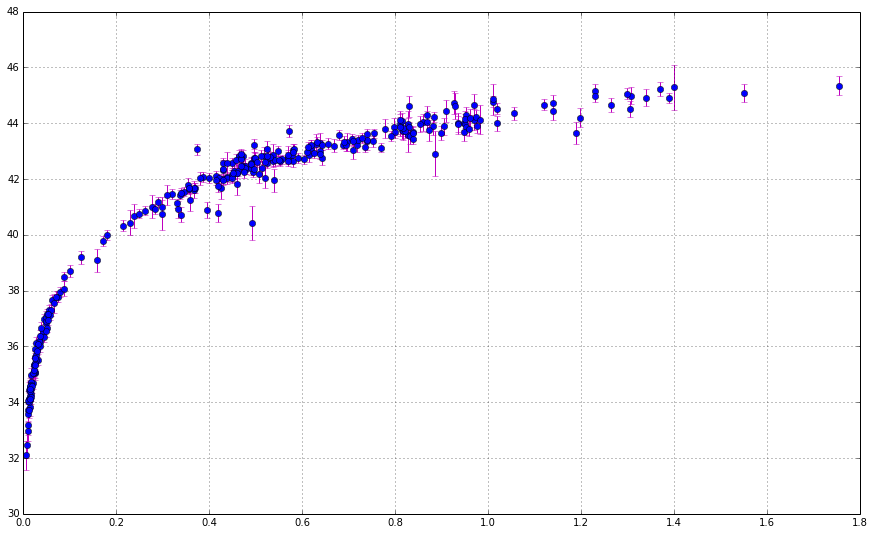

In [21]:
#Question2

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%matplotlib inline

z = np.genfromtxt('SN.dat', skip_header=1, usecols=(1))
mu = np.genfromtxt('SN.dat', skip_header = 1, usecols=2)
sigma = np.genfromtxt('SN.dat', skip_header = 1, usecols=3)
plt.figure(figsize=(15,9))
plt.errorbar(z, mu, yerr=sigma, fmt='o', ecolor='m')
plt.grid(True)

omegaM = 0.23
omegaL = 0.73
omegaR = 8.4E-5

def E_of_Z(z):
    E_z = np.power(( (omegaR*np.power((1.0+z),4.0)) + (omegaM*np.power((1.0+z),3.0)) + omegaL ),0.5)
    return E_z







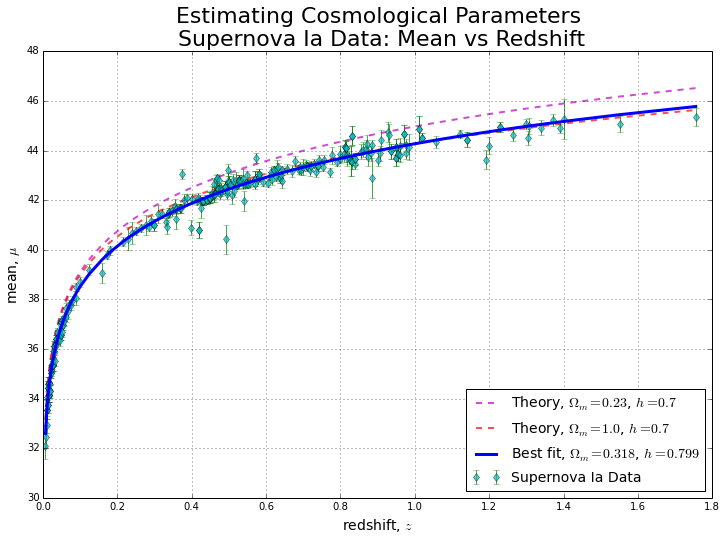

Theory when h = 0.7
Chisquared for Omega_m = 0.23: 11.1700691132 - not a good fit
Chisquared for Omega_m = 1.0: 0.673360096309 - over-fit

Best fit Chisquared (leastsq): 1.49795279479 - good fit, close to 1
Where, h = 0.799218140227 and Omega_m = 0.317969104107


In [3]:
#Question 3

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import emcee 

%matplotlib inline

z_data = np.genfromtxt('SN.dat', skip_header=1, usecols=(1))
mu_data = np.genfromtxt('SN.dat', skip_header=1, usecols=(2))
err_data = np.genfromtxt('SN.dat', skip_header=1, usecols=(3))


z = np.array(z_data)
mu = np.array(mu_data)
err = np.array(err_data)


z.sort()
for i in range(len(z)):
    for j in range(len(z)):
        if z_data[j] == z[i]:
            mu[i] = mu_data[j]
            err[i] = err_data[j]

OmegaM0 = 0.23
OmegaM1 = 1.0
h0 = 0.7
steps = len(z) 
params0 = [h0, OmegaM0]
params1 = [h0, OmegaM1]


def f(z, params):
    h, OmegaM = params 
    OmegaL = 1.0-OmegaM 
    f = (3000.0/h)/(np.sqrt(OmegaM*np.power((1.0+z),3.0)+OmegaL)) 
    return f

def Dc(z, params):
    h, OmegaM = params
    Dc = [] 
    f_int = lambda z: f(z, params) 
    for i in range(steps): 
        intEz = integrate.quad(f_int,0.0,z[i]) 
        Dc.append(intEz[0]) 
    return Dc

def DL(z, params):
    h, OmegaM = params
    DL = (1.0+z)*Dc(z, params) 
    return DL


def MU(z, params):
    h, OmegaM = params
    MU = [] 
    MU = 25.0 - 5.0*np.log10(h) + 5.0*np.log10(DL(z, params))
    return MU
def chi2(params, args=(z,mu,err)): 
    h, OmegaM = params
    MU0 = MU(z, params) 
    for i in range(steps):
        chi2 = 0.0
        chi2 += np.power((mu[i]-MU0[i]),2.0)/np.power(err[i],2.0) 
    return chi2


fitfunc = lambda params, z: MU(z, params) 
errfunc = lambda params, z, y: fitfunc(params, z) - y 
p0 = params1 
p1, success = optimize.leastsq(errfunc, p0[:], args=(z, mu)) 

plt.figure(figsize=(12,8))
plt.plot(z, MU(z, params0), 'm--', linewidth=2, alpha=0.7, label='Theory, $\Omega_{m} = 0.23$, $h = 0.7$')
plt.plot(z, MU(z, params1), 'r--', linewidth=2, alpha=0.7, label='Theory, $\Omega_{m} = 1.0$, $h = 0.7$')
plt.errorbar(z, mu, yerr=err, fmt='cd', ecolor='g', alpha=0.7, label='Supernova Ia Data')
plt.plot(z, MU(z, p1), 'b', linewidth=3, label='Best fit, $\Omega_{m} = 0.318$, $h = 0.799$')
plt.legend(fontsize=14, loc=4)
plt.grid(True)
plt.xlabel('redshift, $z$',fontsize=14)
plt.ylabel('mean, $\mu$',fontsize=14)
plt.title('Estimating Cosmological Parameters\n Supernova Ia Data: Mean vs Redshift',fontsize=22)
plt.show()

print "Theory when h = 0.7"
print "Chisquared for Omega_m = 0.23: "+str(chi2(params0, args=(z,mu,err))) + ' - not a good fit'
print "Chisquared for Omega_m = 1.0: "+str(chi2(params1, args=(z,mu,err))) + ' - over-fit'

'''
Minimizing chi2 doesn't make sense, so I'm not using those parameter, they give a chi2 value close to 0 which is over-fitting.
'''

print "\nBest fit Chisquared (leastsq): "+str(chi2(p1, args=(z,mu,err))) + ' - good fit, close to 1'
print 'Where, h = ' +str(p1[0]) + ' and Omega_m = ' +str(p1[1])